# Cálculo numérico de parámetros relacionados con el lanzamiento de un misíl considerando la resitencia del aire

Un misil es lanzado con una velocidad inicial $v_0$ y sin considerar la resistencia con el aire (es decir k=0) el problema se reduce a un simple caso de tiro parabólico, sin embargo al considerar dicha resistencia luego el tiempo total de vuelo no es el mismo que en el caso del tiro parabólico simple y consecuentemente tampoco su alcance.

En problema consiste en hallar el tiempo de vuelo total (cuando $y(t) = 0$) mediante un método numérico para distintos valores de velocidad  inicial $v_0$, de coficiente de resistencia con el viento $k$ y ángulo $\theta$  de lanzamiento. El método debe ser tal que permita hallar raíces (valores dónde $T=0$) de la ecuación trascendental, dónde $T$ es el tiempo de vuelo total: $$ T = {{V_0yk+g}\over{gk}}(1-e^{-kT}) $$ ** ec. 1 **

La ecuación que describe la distancia la dirección x es:
$${x}(t)={V_{0x}\over k}(1-e^{-kt})$$
**ec.2**

Y en la dirección y:
$${y}(t)=-{{g}\over{k}}t + {{V_{0y}k+g}\over{k^2}}(1 -e^{-kt})$$
**ec.3**

## a) Calculando T para distintos valores de parámetros

In [1]:
import matplotlib.pyplot as plot
import math
import pandas as pd

Los valores para los parámetros $v_0$ y $\theta$:

In [2]:
v_0 = 500 #en m/s

In [16]:
theta = 65   #en grados 
theta_rad=theta*(math.pi)/180 #conversion a radianes
theta_rad 

1.1344640137963142

Velocidades iniciales en $y$ y en $x$. Se asume que sale del orginen por lo que $x_0=0$ y $y_0=0$.

In [4]:
#La velocidad en y
v_0y=v_0*math.sin(theta_rad)

#La velocidad en x
v_0x= v_0*math.cos(theta_rad)

La funcion trascendental y su derivada. Tambien la función de error.

In [161]:
#La funcion trascendental ec.1
def f(T,k,v_0=500,theta):   
    theta_rad=theta*(math.pi)/180 #conversion a radianes 
    v_0y=v_0*math.sin(theta_rad)  #velocidad en y
    g=9.8
    return ((k*v_0y + g)/(g*k))*(1-math.exp(-k*T))-T

#La derivada de la función trascendental
def Df(T,k,v_0=500,theta):  
    theta_rad=theta*(math.pi)/180 #conversion a radianes 
    v_0y=v_0*math.sin(theta_rad)  #velocidad en y
    g=9.8
    return (k*v_0y + g)/(g)*math.exp(-k*T) - 1

#El error relativo
def P_err(x_0,x_1):   
    return abs((x_0-x_1)/x_0)*100

Funciones de posición en direcones $x$ y $y$ y sus derivadas (velocidades).

In [154]:
#Distancia en direccion x ec.2
def rx(t,k,v_0=500,theta): 
    theta_rad=theta*(math.pi)/180 #conversion a radianes 
    v_0x= v_0*math.cos(theta_rad) #velocidad en x
    return (v_0x/k)*(1.0-math.exp(-k*t))

#Distancia en dirección y ec.3
def ry(t,k,v_0=500,theta):
    theta_rad=theta*(math.pi)/180 #conversion a radianes 
    v_0y=v_0*math.sin(theta_rad)  #velocidad en y
    g=9.8
    return -(g/k)*t + ((v_0y*k + g)/(k**2.0))*(1.0-math.exp(-k*t))

#Velocidad en direccion x 
def vx(t,k,v_0=500,theta): 
    theta_rad=theta*(math.pi)/180 #conversion a radianes 
    v_0x= v_0*math.cos(theta_rad) #velocidad en x
    return (v_0x)*(math.exp(-k*t))

#Velocidad en dirección y
def vy(t,k,v_0=500,theta):
    theta_rad=theta*(math.pi)/180 #conversion a radianes 
    v_0y=v_0*math.sin(theta_rad)  #velocidad en y
    g=9.8
    return -(g/k) + ((v_0y*k + g)/(k))*(math.exp(-k*t))



Ahora vamos a generar gráficas para la ec. 1 y observar la ubicación aproximada de las raíces. Iremos variando el parámetro k para observar cómo cambia la forma de la curva y así estimar los límites apropiados.

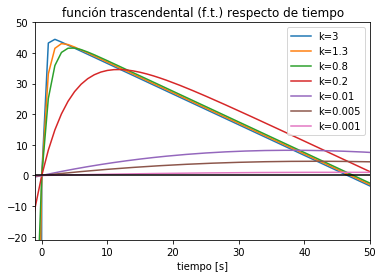

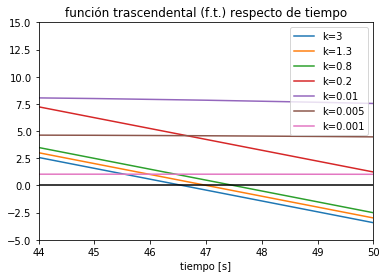

In [174]:
#Un conjunto de puntos generados para evaluar ahí la ec.2
x_i=[]
h=0.05
for n in range(-100,201):
    x_i.append(n)
    
#a______________________________
#Un valor "a" para el parámetro 
k_i=3    
#Ec. 1 evaluada en distintos puntos con parámetro "a" dado
f_na=[]
for i in range(301):
    f_na.append(f(x_i[i],k_i,500,65))
#a1_____________________________
#Un valor "a1" para el parámetro k
k_i=1.3    
#Ec. 1 evaluada en distintos puntos con parámetro "a1" dado
f_na1=[]
for i in range(301):
    f_na1.append(f(x_i[i],k_i,500,65))
    
#b______________________________
#Un valor "b" para el parámetro k
k_i=0.8
#Ec. 1 evaluada en distintos puntos con parámetro "b" dado    
f_nb=[]
for i in range(301):
    f_nb.append(f(x_i[i],k_i,500,65))
#b1______________________________
#Un valor "b1" para el parámetro k
k_i=0.2
#Ec. 1 evaluada en distintos puntos con parámetro "b1" dado    
f_nb1=[]
for i in range(301):
    f_nb1.append(f(x_i[i],k_i,500,65))
    
#c______________________________
#Un valor "c" para el parámetro k
k_i=0.01    
f_nc=[]
for i in range(301):
    f_nc.append(f(x_i[i],k_i,500,65))
    
#d______________________________
k_i=0.005    
f_nd=[]
for i in range(301):
    f_nd.append(f(x_i[i],k_i,500,65))
    
#d1______________________________
k_i=0.001    
f_nd1=[]
for i in range(301):
    f_nd1.append(f(x_i[i],k_i,500,65))
    
#comparando a, b, c  y d________
    

la = plot.plot(x_i,f_na, label = 'k=3')
la1 = plot.plot(x_i,f_na1, label = 'k=1.3')
lb = plot.plot(x_i,f_nb, label = 'k=0.8')
lb1 = plot.plot(x_i,f_nb1, label = 'k=0.2')
lc = plot.plot(x_i,f_nc, label = 'k=0.01')
ld = plot.plot(x_i,f_nd, label = 'k=0.005')
ld1 = plot.plot(x_i,f_nd1, label = 'k=0.001')

plot.axis([-1,50,-21,50])
plot.title("función trascendental (f.t.) respecto de tiempo")
plot.ylabel("")
plot.xlabel("tiempo [s]")
plot.legend()
plot.axhline(y=0, color='k')
plot.show()

la = plot.plot(x_i,f_na, label = 'k=3')
la1 = plot.plot(x_i,f_na1, label = 'k=1.3')
lb = plot.plot(x_i,f_nb, label = 'k=0.8')
lb1 = plot.plot(x_i,f_nb1, label = 'k=0.2')
lc = plot.plot(x_i,f_nc, label = 'k=0.01')
ld = plot.plot(x_i,f_nd, label = 'k=0.005')
ld1 = plot.plot(x_i,f_nd1, label = 'k=0.001')

plot.axis([44,50,-5,15])
plot.title("función trascendental (f.t.) respecto de tiempo")
plot.ylabel("")
plot.xlabel("tiempo [s]")
plot.legend()
plot.axhline(y=0, color='k')
plot.show()

Se requiere acotar el rango dónde se buscarán las raíces, para ello se solicitan el límite superior y el límite inferior, para estimarlos solo se observan las gráficas variando el parámetro k. Se observó que cuando k tiende a 0 el tiempo tiende a infinito, esto se debe a la forma de la ecuación trascendental con k en el denominador, sin embargo el caso debe reducirse en la práctica a un tiro parabólico sin fricción con el aire. Si k es muy grande tambien se llega a un límite, $v_{0y}/g$ que para los valores de $v_0=500$ esta al rededor de 46.24 seg.

limite inferior a, y superior b

In [7]:
a=40.0
b=50.0


Usarémos el método de *Newton_Rhapson* con una ligera modificación, combinamos con el método de bisección para asegurar que no diverja.

In [175]:
    '''
        fa es la función evaluada en a
        fb es la función evaluada en b
    '''

    fa = f(a,k_i,500,65)
    fb = f(b,k_i,500,65)

    '''
        Hay que asegurarse de no dar como límite una raíz.
        Para este caso en particular, la función trascendental
        tiene una raíz en T=0, asi que no debemos usar 0 como
        límite
    '''        
    if fa == 0.0: print("el límite inferior es la raíz: {a}")        
    if fb == 0.0: print("el límite superior es la raíz: {b}")

    '''
        Si el producto de la funcion evaluada en los límites
        es mayor que cero, esto quiere decir que la raíz no
        está acotada por los límites datos y habrá que cambiarlos
    '''
    if fa*fb > 0.0: print("la raíz no está acotada")
    '''
        Se usa el método de bisección para asegurarnos de converger
    '''
    x = 0.5*(a + b)

Newton Raphson

In [162]:
'''
f es una función
Df es la derivada de f
tol es la tolerancia, es decir el valor que prácticamente considerariamos 0
'''
def newtonRaphson(a, b,k,x,v_0,theta):
    #no es necesaria la conversion porque las funciones que usamos ya la hacen internamente
        #theta_rad=theta*(math.pi)/180 #conversion a radianes 
    #tampoco es necesario calcular v_0x, v_oy
        #v_0x= v_0*math.cos(theta_rad) #velocidad en x
        #v_0y=v_0*math.sin(theta_rad)  #velocidad en y
    tol=1.0e-9
    i=0

    while i < 300:
        fx = f(x,k,v_0,theta)
        if abs(fx) < tol: 
            return x

        # Tighten the brackets on the root
        if fa*fx < 0.0:
            b = x
        else:
            a = x
    
        # Try a Newton-Raphson step
        dfx = Df(x,k,v_0,theta)
        
        # If division by zero, push x out of bounds
        try: 
            dx = -fx/dfx
        except ZeroDivisionError: 
            dx = b-a
            
        x = x + dx

        # If the result is outside the brackets, use bisection
        if (b - x)*(x - a) < 0.0:
            dx = 0.5*(b-a)
        
        x = a + dx
                
        # Check for convergence
        if abs(dx) < tol*max(abs(b),1.0): 
            return x
        i=i+1
    print("Too many iterations in Newton-Raphson")
    return x


Ahora haremos variar k y obtendremos los distintos valores de t para cada k.

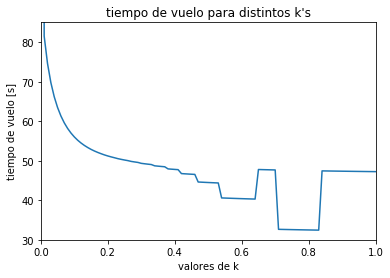

In [61]:
k_n=[0.001]
for i in range(1,1001):
    k_n.append(i*0.01)

t_n=[1e9]
for i in range(1,1001):
    x = 0.5*(a + b)
    t_n.append(newtonRaphson(a,b,k_n[i],x,500,65))
    
plot.plot(k_n,t_n)
plot.axis([0,1,30,85])
plot.title("tiempo de vuelo para distintos k's")
plot.xlabel("valores de k")
plot.ylabel("tiempo de vuelo [s]")
plot.axhline(y=0, color='k')
#plot.legend("n")
plot.show()

Notamos que tiene unas variaciones abruptas en la region dónde k vale de 0.3 a poco más de 6.5 y luego una pequeña región entre 6.9 y 8.4, esas dós caidas deberian darnos raíces de tiempo de vuelo que decaen por regiones muy rápico y luego regresan a valores estándares luego vuelven a caer los valores.

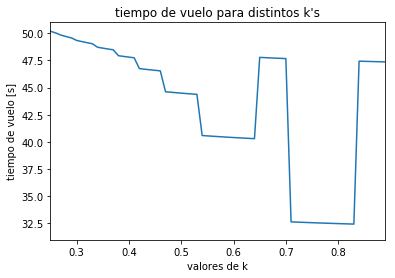

In [62]:
plot.plot(k_n,t_n)
plot.axis([0.25,0.89,31,51])
plot.title("tiempo de vuelo para distintos k's")
plot.xlabel("valores de k")
plot.ylabel("tiempo de vuelo [s]")
plot.axhline(y=0, color='k')
#plot.legend("n")
plot.show()

Veamos cómo se comporta la curva que describe la ec.1 en ese rango de valores de k. Usaremos los valores k=: 0.5, 0.55, 0.6, 0.66, 0.68, 0.7, 0.73, 0.9.

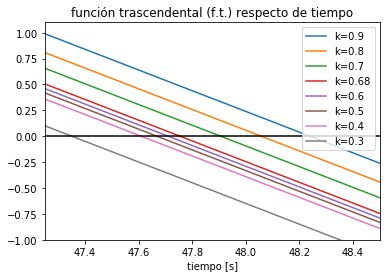

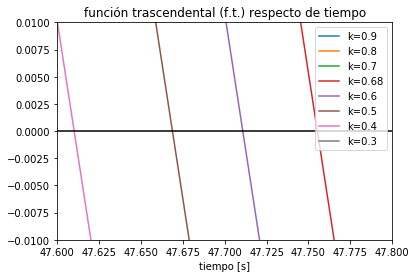

In [176]:
#Un conjunto de puntos generados para evaluar ahí la ec.2
x_i=[]
h=0.05
for n in range(-100,201):
    x_i.append(n)
    
#a______________________________
#Un valor "a" para el parámetro 
k_i=0.5    
#Ec. 1 evaluada en distintos puntos con parámetro "a" dado
f_na=[]
for i in range(301):
    f_na.append(f(x_i[i],k_i,500,65))
#a1_____________________________
#Un valor "a1" para el parámetro k
k_i=0.55    
#Ec. 1 evaluada en distintos puntos con parámetro "a1" dado
f_na1=[]
for i in range(301):
    f_na1.append(f(x_i[i],k_i,500,65))
    
#b______________________________
#Un valor "b" para el parámetro k
k_i=0.6
#Ec. 1 evaluada en distintos puntos con parámetro "b" dado    
f_nb=[]
for i in range(301):
    f_nb.append(f(x_i[i],k_i,500,65))
#b1______________________________
#Un valor "b1" para el parámetro k
k_i=0.66
#Ec. 1 evaluada en distintos puntos con parámetro "b1" dado    
f_nb1=[]
for i in range(301):
    f_nb1.append(f(x_i[i],k_i,500,65))
    
#c______________________________
#Un valor "c" para el parámetro k
k_i=0.68    
f_nc=[]
for i in range(301):
    f_nc.append(f(x_i[i],k_i,500,65))
    
#d______________________________
k_i=0.7 
f_nd=[]
for i in range(301):
    f_nd.append(f(x_i[i],k_i,500,65))
    
#d1______________________________
k_i=0.73    
f_nd1=[]
for i in range(301):
    f_nd1.append(f(x_i[i],k_i,500,65))
    
#d2______________________________
k_i=0.9
f_nd2=[]
for i in range(301):
    f_nd2.append(f(x_i[i],k_i,500,65))
    
#comparando a, b, c  y d________
    

la = plot.plot(x_i,f_na, label = 'k=0.9')
la1 = plot.plot(x_i,f_na1, label = 'k=0.8')
lb = plot.plot(x_i,f_nb, label = 'k=0.7')
lb1 = plot.plot(x_i,f_nb1, label = 'k=0.68')
lc = plot.plot(x_i,f_nc, label = 'k=0.6')
ld = plot.plot(x_i,f_nd, label = 'k=0.5')
ld1 = plot.plot(x_i,f_nd1, label = 'k=0.4')
ld2 = plot.plot(x_i,f_nd2, label = 'k=0.3')

plot.axis([47.25,48.5,-1,1.1])
plot.title("función trascendental (f.t.) respecto de tiempo")
plot.ylabel("")
plot.xlabel("tiempo [s]")
plot.legend()
plot.axhline(y=0, color='k')
plot.show()

la = plot.plot(x_i,f_na, label = 'k=0.9')
la1 = plot.plot(x_i,f_na1, label = 'k=0.8')
lb = plot.plot(x_i,f_nb, label = 'k=0.7')
lb1 = plot.plot(x_i,f_nb1, label = 'k=0.68')
lc = plot.plot(x_i,f_nc, label = 'k=0.6')
ld = plot.plot(x_i,f_nd, label = 'k=0.5')
ld1 = plot.plot(x_i,f_nd1, label = 'k=0.4')
ld2 = plot.plot(x_i,f_nd2, label = 'k=0.3')

plot.axis([47.6,47.8,-0.01,0.01])
plot.title("función trascendental (f.t.) respecto de tiempo")
plot.ylabel("")
plot.xlabel("tiempo [s]")
plot.legend()
plot.axhline(y=0, color='k')
plot.show()

Quizá sea error de máquina o código, no coínciden las 2 formas de calcular k.

## b) El rango contra K

Calculamos el tiempo de vuelo total para k=0, k=0.05, k=0.1, k=0.5, k=1.

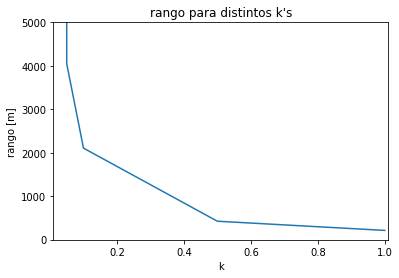

In [177]:
k_n=[0,0.05,0.1,0.5,1.0]

t_n=[1e9] #Como en K=0 la ec. trascendental daria inifinito, solo definimos un numero muy grande
for i in range(1,5):
    x = 0.5*(a + b)
    t_n.append(newtonRaphson(a,b,k_n[i],x,500,65))

rx_max_n=[1e9] #Como para k=0 la ec. trascendental daria un tiempo inifinito, el alcance seria infinito (jamás toca el suelo)
for i in range(1,5):
    rx_max_n.append(rx(t_n[i],k_n[i],500,65))
    
plot.plot(k_n,rx_max_n)
plot.axis([0.01,1.01,-5,5000])
plot.title("rango para distintos k's")
plot.ylabel("rango [m]")
plot.xlabel("k")
#plot.legend("n")
plot.show()



## c) Distancia vertical vs. Distancia horizontal

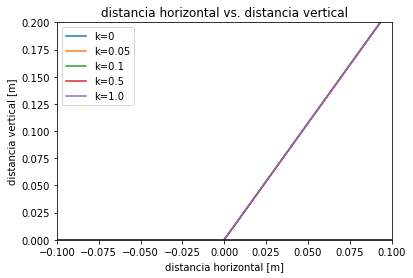

In [178]:
k_n=[0.001,0.05,0.1,0.5,1.0]

t_n=[]
h=0.01
for n in range(10001):
    t_n.append(h*n)

#k=0.0001-----------------------
rx_n=[]
for i in range(10001):
    rx_n.append(rx(t_n[i],k_n[0],500,65))

ry_n=[]
for i in range(10001):
    ry_n.append(ry(t_n[i],k_n[0],500,65))
    
#k=0.05-------------------------
rx_n1=[]
for i in range(10001):
    rx_n1.append(rx(t_n[i],k_n[1],500,65))

ry_n1=[]
for i in range(10001):
    ry_n1.append(ry(t_n[i],k_n[1],500,65))
    
#k=0.1-------------------------
rx_n2=[]
for i in range(10001):
    rx_n2.append(rx(t_n[i],k_n[2],500,65))

ry_n2=[]
for i in range(10001):
    ry_n2.append(ry(t_n[i],k_n[2],500,65))
    
#k=0.5-------------------------
rx_n3=[]
for i in range(10001):
    rx_n3.append(rx(t_n[i],k_n[3],500,65))

ry_n3=[]
for i in range(10001):
    ry_n3.append(ry(t_n[i],k_n[3],500,65))
    
#k=1.0-------------------------
rx_n4=[]
for i in range(10001):
    rx_n4.append(rx(t_n[i],k_n[4],500,65))

ry_n4=[]
for i in range(10001):
    ry_n4.append(ry(t_n[i],k_n[4],500,65))

    
#GRAFICA------------------------
plot.plot(rx_n,ry_n, label='k=0')
plot.plot(rx_n1,ry_n1, label='k=0.05')
plot.plot(rx_n2,ry_n2, label='k=0.1')
plot.plot(rx_n3,ry_n3, label= 'k=0.5')
plot.plot(rx_n4,ry_n4, label= 'k=1.0')
plot.legend()
plot.axis([-0.1,0.1,-0.0001,0.2])
plot.title("distancia horizontal vs. distancia vertical")
plot.xlabel("distancia horizontal [m]")
plot.ylabel("distancia vertical [m]")
plot.axhline(y=0, color='k')
plot.show()



Como podemos ver, la relación entre distancia vertical y distancia horizonal es líneal y constante a pesar de variar k.

## d) Altura vs. Tiempo

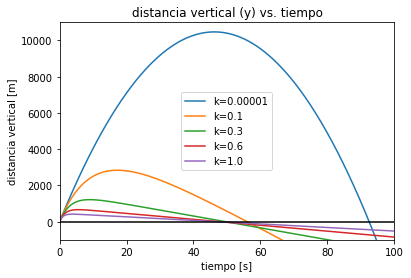

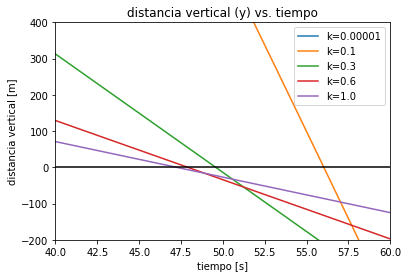

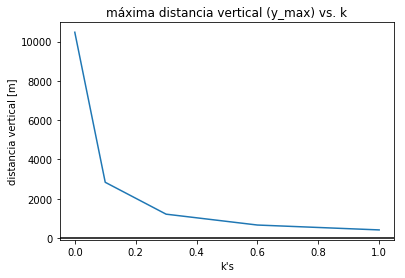

In [179]:
t_n=[]
h=0.01
for n in range(10001):
    t_n.append(h*n)


k_i = 0.00001
ry_n0=[]
for i in range(10001):
    ry_n0.append(ry(t_n[i],k_i,500,65))
    

k_i = 0.1
ry_n1=[]
for i in range(10001):
    ry_n1.append(ry(t_n[i],k_i,500,65))
    

k_i = 0.3
ry_n2=[]
for i in range(10001):
    ry_n2.append(ry(t_n[i],k_i,500,65))
    

k_i = 0.6
ry_n3=[]
for i in range(10001):
    ry_n3.append(ry(t_n[i],k_i,500,65))

k_i = 1.0
ry_n4=[]
for i in range(10001):
    ry_n4.append(ry(t_n[i],k_i,500,65))
    
k_n=[0.00001,0.1,0.3,0.6,1.0]
    

ry_ni={'n0':ry_n0,'n1':ry_n1,'n2':ry_n2,'n3':ry_n3, 'n4':ry_n4}
ry_nif=pd.DataFrame(data=ry_ni)

ry_ni_max=[ry_nif.n0.max(),ry_nif.n1.max(),ry_nif.n2.max(),ry_nif.n3.max(),ry_nif.n4.max()]    
 
plot.plot(t_n,ry_n0, label="k=0.00001")
plot.plot(t_n,ry_n1,  label="k=0.1")
plot.plot(t_n,ry_n2,  label="k=0.3")
plot.plot(t_n,ry_n3,  label="k=0.6")
plot.plot(t_n,ry_n4,  label="k=1.0")
plot.legend()
plot.axis([-0.001,100,-1e3,11e3])
plot.title("distancia vertical (y) vs. tiempo")
plot.ylabel("distancia vertical [m]")
plot.xlabel("tiempo [s]")
plot.axhline(y=0, color='k')
plot.show()

plot.plot(t_n,ry_n0, label="k=0.00001")
plot.plot(t_n,ry_n1,  label="k=0.1")
plot.plot(t_n,ry_n2,  label="k=0.3")
plot.plot(t_n,ry_n3,  label="k=0.6")
plot.plot(t_n,ry_n4,  label="k=1.0")
plot.legend()
plot.axis([40,60,-0.2e3,400])
plot.title("distancia vertical (y) vs. tiempo")
plot.ylabel("distancia vertical [m]")
plot.xlabel("tiempo [s]")
plot.axhline(y=0, color='k')
plot.show()

plot.plot(k_n,ry_ni_max)
##plot.axis([-0.001,100,-1e3,11e3])
plot.title("máxima distancia vertical (y_max) vs. k")
plot.ylabel("distancia vertical [m]")
plot.xlabel("k's")
plot.axhline(y=0, color='k')
plot.show()

## d) Velocidad vertical vs. tiempo, Velocidad horizontal vs. tiempo

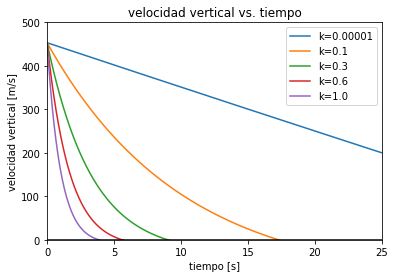

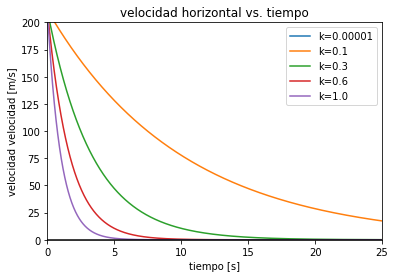

In [180]:
t_n=[]
h=0.01
for n in range(10001):
    t_n.append(h*n)

k_i = 0.001

vx_n0=[]
for i in range(10001):
    vx_n0.append(vx(t_n[i],k_i,500,65))

vy_n0=[]
for i in range(10001):
    vy_n0.append(vy(t_n[i],k_i,500,65))
    
k_i = 0.1

vx_n1=[]
for i in range(10001):
    vx_n1.append(vx(t_n[i],k_i,500,65))

vy_n1=[]
for i in range(10001):
    vy_n1.append(vy(t_n[i],k_i,500,65))
    
k_i = 0.3

vx_n2=[]
for i in range(10001):
    vx_n2.append(vx(t_n[i],k_i,500,65))

vy_n2=[]
for i in range(10001):
    vy_n2.append(vy(t_n[i],k_i,500,65))
    
k_i = 0.6

vx_n3=[]
for i in range(10001):
    vx_n3.append(vx(t_n[i],k_i,500,65))

vy_n3=[]
for i in range(10001):
    vy_n3.append(vy(t_n[i],k_i,500,65))
    
k_i = 1

vx_n4=[]
for i in range(10001):
    vx_n4.append(vx(t_n[i],k_i,500,65))

vy_n4=[]
for i in range(10001):
    vy_n4.append(vy(t_n[i],k_i,500,65))

 
plot.plot(t_n,vy_n0, label="k=0.00001")
plot.plot(t_n,vy_n1,  label="k=0.1")
plot.plot(t_n,vy_n2,  label="k=0.3")
plot.plot(t_n,vy_n3,  label="k=0.6")
plot.plot(t_n,vy_n4,  label="k=1.0")
plot.legend()
plot.axis([-0.001,25,0,500])
plot.title("velocidad vertical vs. tiempo")
plot.ylabel("velocidad vertical [m/s]")
plot.xlabel("tiempo [s]")
plot.axhline(y=0, color='k')
plot.show()

plot.plot(t_n,vx_n0, label="k=0.00001")
plot.plot(t_n,vx_n1,  label="k=0.1")
plot.plot(t_n,vx_n2,  label="k=0.3")
plot.plot(t_n,vx_n3,  label="k=0.6")
plot.plot(t_n,vx_n4,  label="k=1.0")
plot.legend()
plot.axis([-0.001,25,0,200])
plot.title("velocidad horizontal vs. tiempo")
plot.ylabel("velocidad velocidad [m/s]")
plot.xlabel("tiempo [s]")
plot.axhline(y=0, color='k')
plot.show()



## e) Ángulo que maximiza el rango

Lo que debo hacer es fijar el parámetro k, calcular T (tiempo total de caída) para ese k partícular pero variando $\theta$ obteniendo $T_1$, $T_2$, ..., $T_n$ datos y con esos datos luego calcular el rango pero considerando que el ángulo es el $\theta_i$ asociado a ese $T_i$ para ese rango particular.

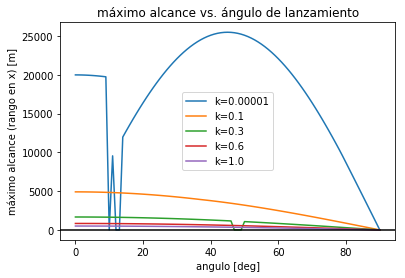

In [184]:
#definimos los distintos valores de k para los que hay que calcular el rango
k_n=[0.00001,0.1,0.3,0.6,1.0]

#creamos un vector que almacene los datos T_i para cada theta_i pero para un k_i particular
#En este caso i=0
x_n=[[],[],[],[],[]]

#El angulo que varia en cada ciclo
theta_n=[]
for i in range(91):
    theta_n.append(i)
#no es necesario convertirlo a rads, ver definicion de funciones

for i in range(5):
    for i2 in range(91):                
        #Es necesario dar un x aproximado cada iteracion del Newton Raphson
        #x = 0.5*(a + b)
        
        #Calculando el tiempo máximo para un theta i2 y un k i
        T=newtonRaphson(a,b,k_n[i],x,500,theta_n[i2])
        
        #calculando el máximo alcance
        x_n[i].append(rx(T,k_n[i],500,theta_n[i2]))
        
#ry_ni={'n0':ry_n0,'n1':ry_n1,'n2':ry_n2,'n3':ry_n3, 'n4':ry_n4}

#x_nf=pd.DataFrame(data=x_n)
        
#print(x_nf)

plot.plot(theta_n,x_n[0],  label="k=0.00001")
plot.plot(theta_n,x_n[1],  label="k=0.1")
plot.plot(theta_n,x_n[2],  label="k=0.3")
plot.plot(theta_n,x_n[3],  label="k=0.6")
plot.plot(theta_n,x_n[4],  label="k=1.0")
plot.legend()
#plot.axis([-0.001,25,0,500])
plot.title("máximo alcance vs. ángulo de lanzamiento")
plot.ylabel("máximo alcance (rango en x) [m]")
plot.xlabel("angulo [deg]")
plot.axhline(y=0, color='k')
plot.show()
